In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

In [3]:
from NonLinearController_ import NonLinearController
from NonLinearObserver_ import NonLinearObserver
from LinearController_ import LinearController
from LinearObserver_ import LinearObserver

In [4]:
from numba import njit

In [8]:
from shared import plot_rollout, plot_fit_scatter

In [7]:
# Section 2.1 - Fit non-linear model to non-noisy target

In [8]:
## Test if model is working correctly

In [8]:
target = CartPole(False)

s0 = np.array([0, 0, np.pi, 0, 0])

x, y = target.simulate(time=10, state=s0, remap=True)


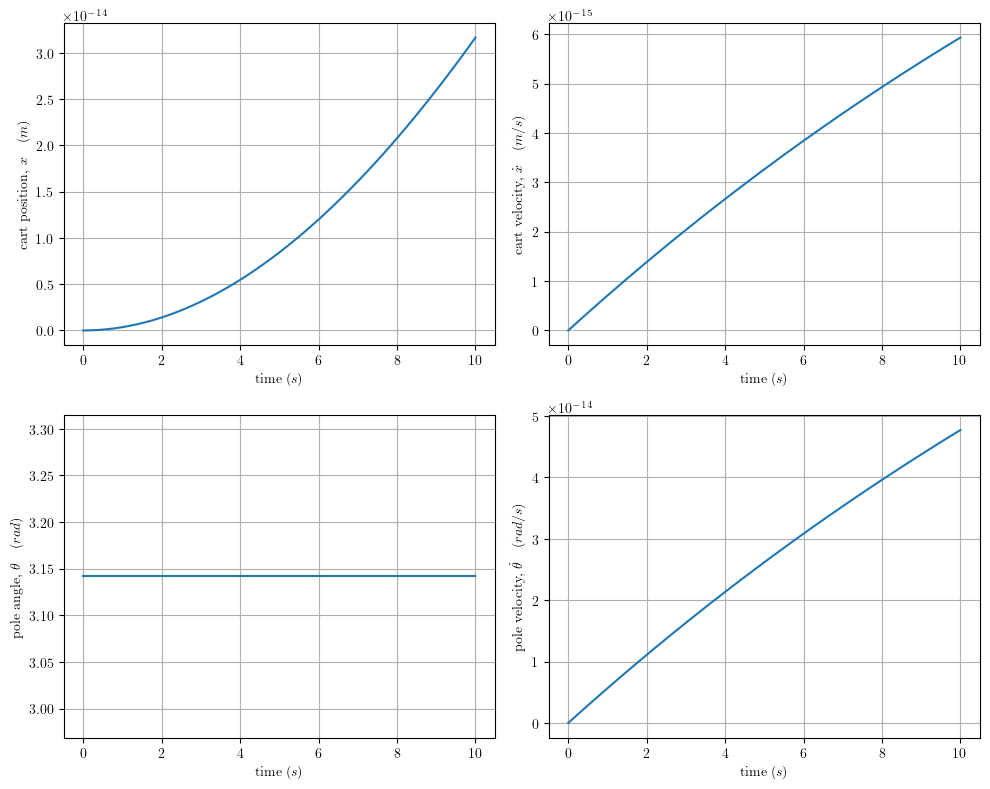

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig)


In [10]:
## Test Numba is working

In [11]:
# target = CartPole(False)

# s0 = np.array([0, 0, 0.5, 0])

# # x, y = target.simulate_numba(time=10, state=s0, remap=True)

# DOES NOT WORK

In [12]:
## Fit model

In [13]:
model = NonLinearObserver.initialize_model(N=11, M=6, with_action=False)


In [14]:
x, y = model.fit(target, enable_remap=False)

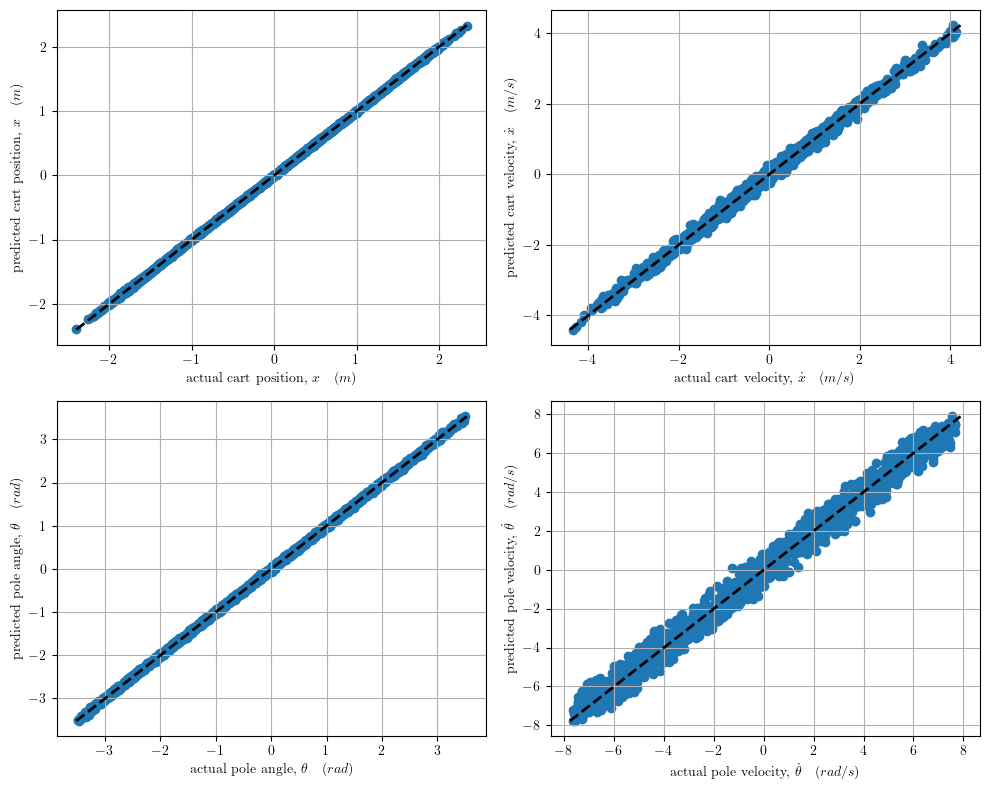

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)

In [16]:
model.save_model("./models/dummy")

In [18]:
model_loaded = NonLinearObserver.initialize_model(N=11, M=6, with_action=False)
model_loaded.load_model("./models/dummy")
assert np.all(model_loaded.sigma == model.sigma)

In [20]:
## Fit model to non-noisy system with no feedback


In [ ]:
N = 13
M = 7

target = CartPole(False)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=False)
_ = model.fit(target, enable_remap=False)
model.save_model(f"./models/2_1__{N}__{M}")

In [93]:
N = 14
M = 9

target = CartPole(False)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=False)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/2_1__{N}__{M}")


In [7]:
N = 14
M = 9

model_loaded = NonLinearObserver.initialize_model(N=N, M=M, with_action=False)
model_loaded.load_model(f"./models/2_1__{N}__{M}")
model_loaded.mse

array(0.00015079)

In [9]:
N = 14
M = 9

model_loaded = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
model_loaded.load_model(f"./models/2_2__{N}__{M}")
model_loaded.mse

array(0.00072145)

In [10]:
N = 14
M = 9

target = CartPole(False)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)


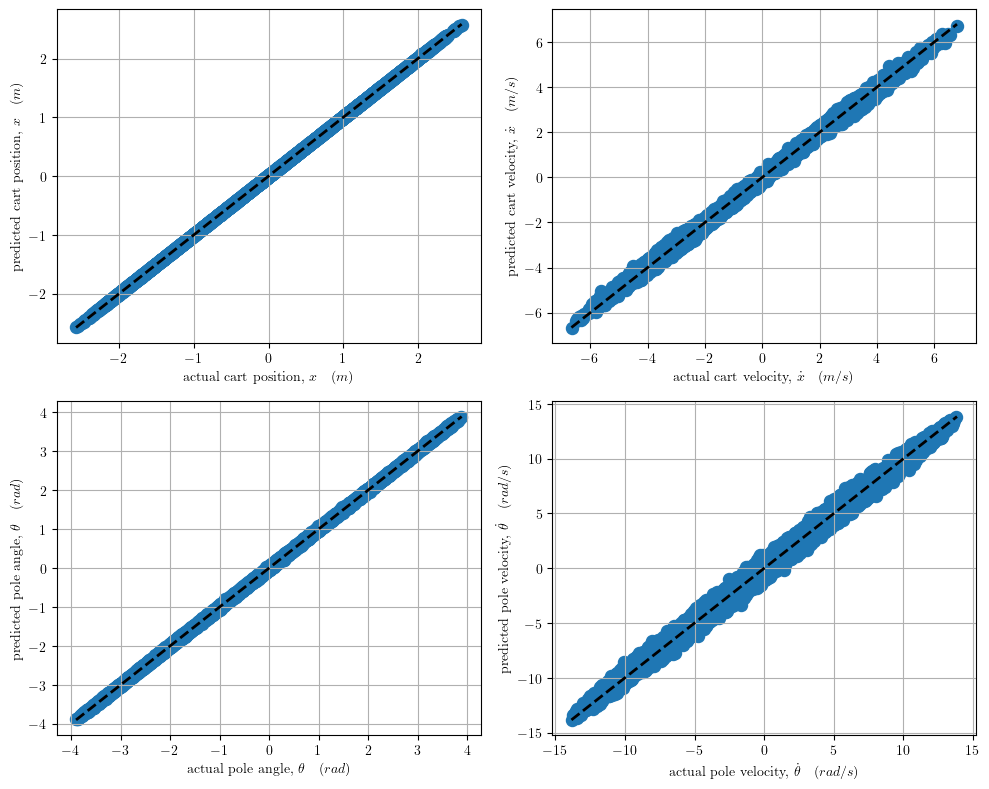

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)

In [21]:
# Section 2.2 - Fit non-linear model to non-noisy target with action

In [23]:
## Test if target is working correctly

0.004621580121506685


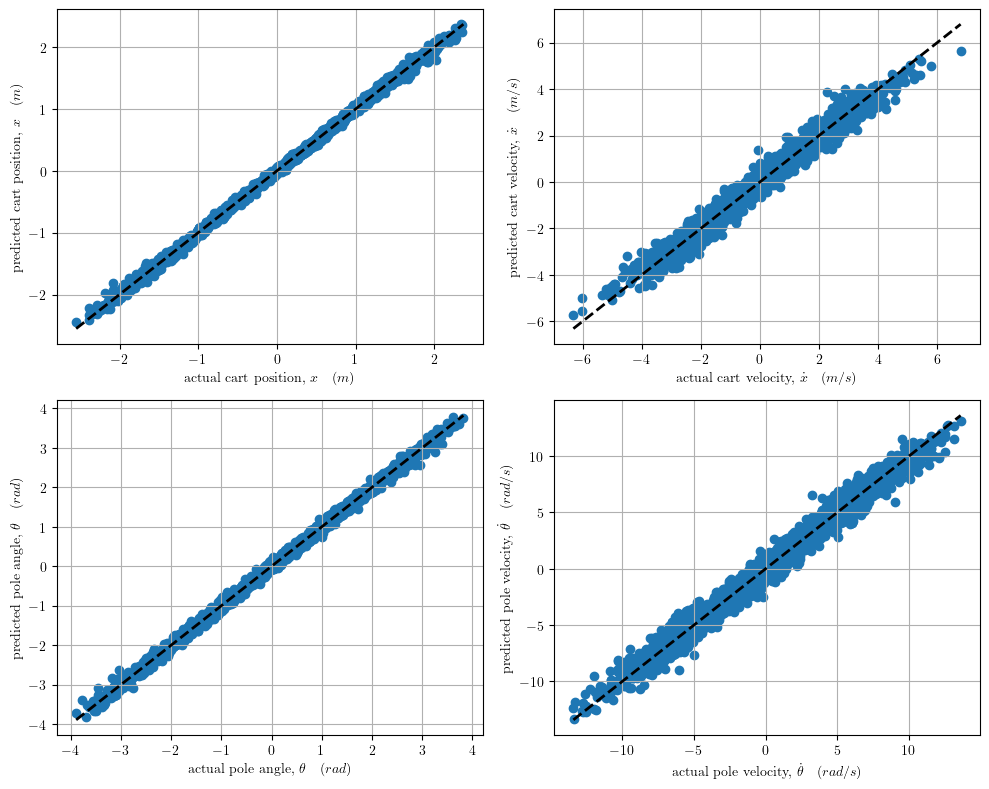

In [60]:
target = CartPole(False)
model = NonLinearObserver.initialize_model(N=11, M=6, with_action=True)
x, y = model.fit(target, enable_remap=False)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)
print(model.mse)

In [27]:
### Compare roll outs

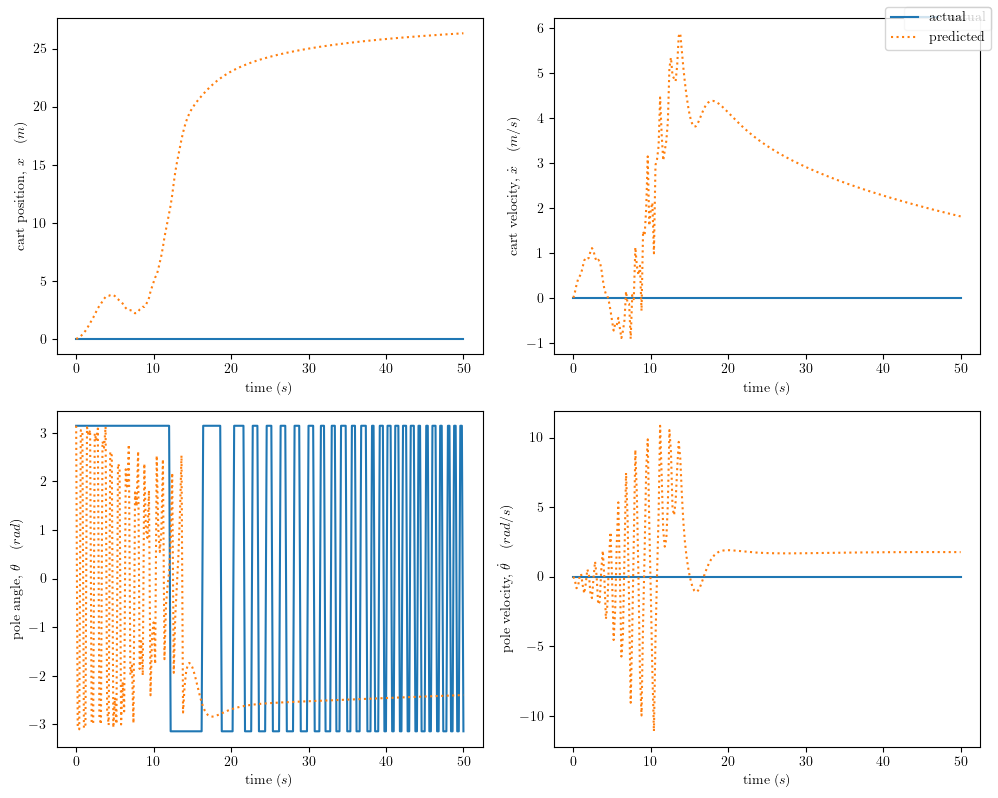

In [34]:
s0 = np.array([0, 0, np.pi, 0, 0])

x, y = target.simulate(time=50, state=s0, remap=True)
x_hat, y_hat = model.simulate(time=50, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')



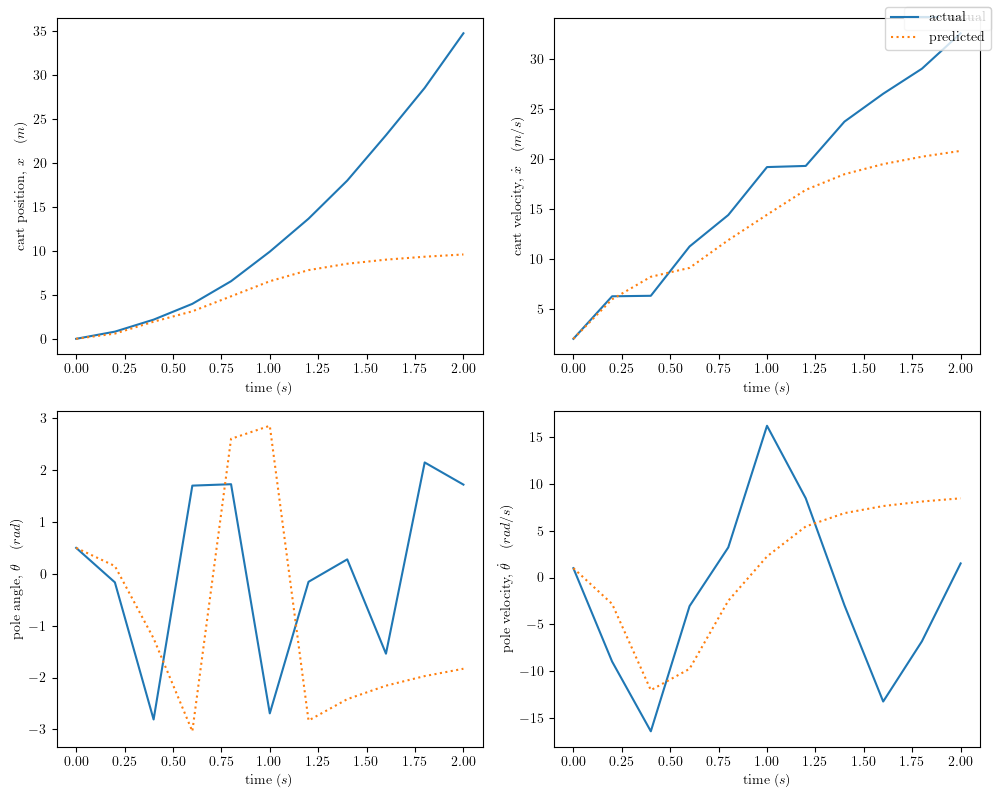

In [39]:
s0 = np.array([0, 2, 0.5, 1, 20])

x, y = target.simulate(time=2, state=s0, remap=True)
x_hat, y_hat = model.simulate(time=2, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')



In [29]:
s0 = np.array([0, 2, 0.5, 1, 2])

x, y = target.simulate(time=2, state=s0, remap=True)
x_hat, y_hat = model.simulate(time=2, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')



NameError: name 'target' is not defined

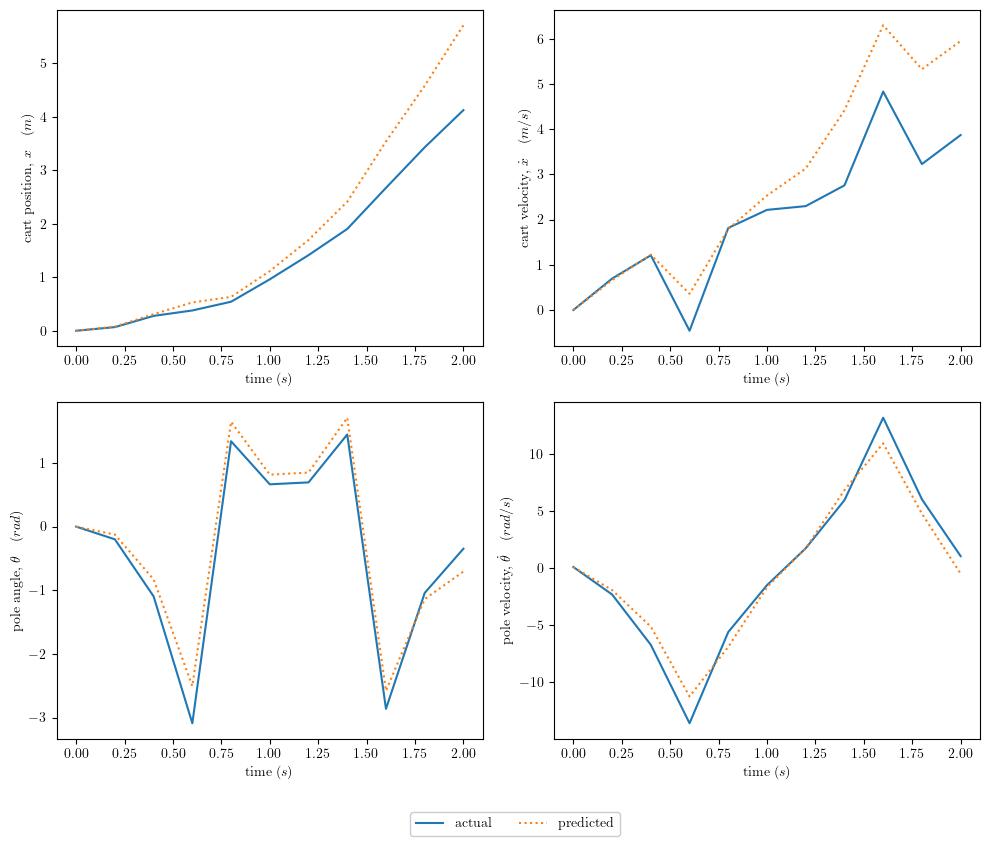

In [45]:
s0 = np.array([0, 0, 0, 0.1, 2])

x, y = target.simulate(time=2, state=s0, remap=True)
x_hat, y_hat = model.simulate(time=2, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=3)




In [ ]:
## Now fit a larger model

In [15]:
N = 13
M = 8

target = CartPole(False)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
_ = model.fit(target, enable_remap=False)
model.save_model(f"./models/2_2__{N}__{M}")

In [52]:
N = 14
M = 9

target = CartPole(False)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
_ = model.fit(target, enable_remap=False)
model.save_model(f"./models/2_2__{N}__{M}")

In [53]:
## Test actual model

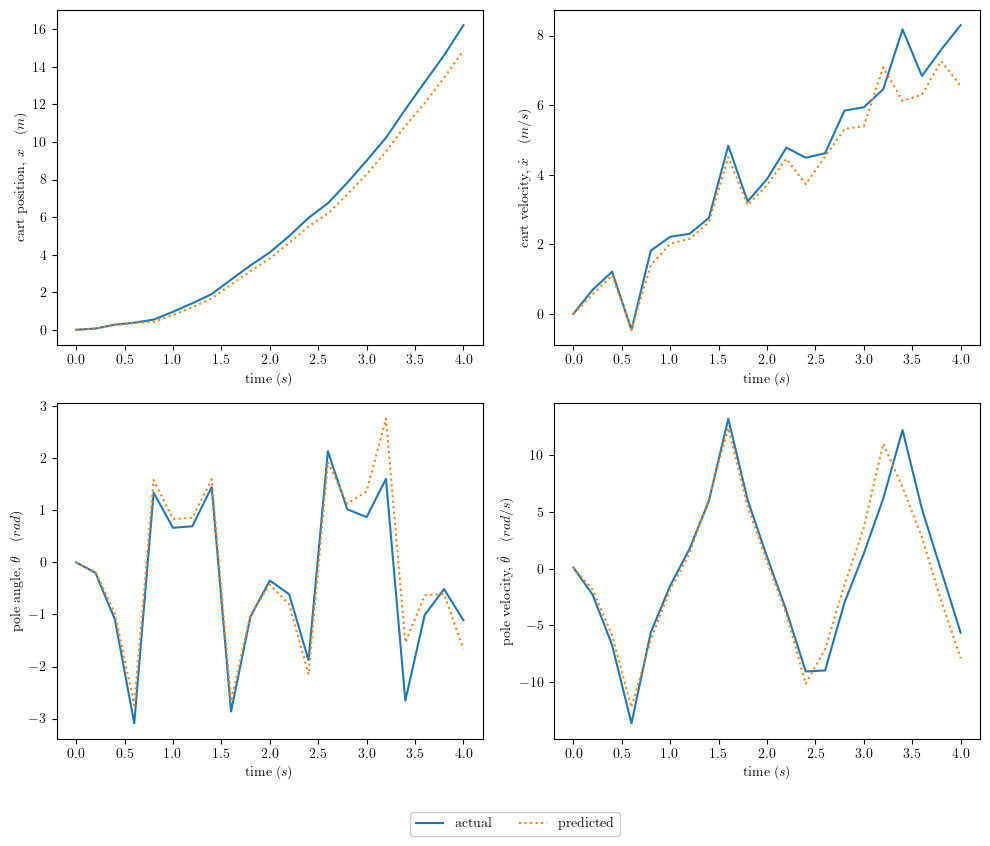

In [56]:
s0 = np.array([0, 0, 0, 0.1, 2])

x, y = target.simulate(time=4, state=s0, remap=True)
x_hat, y_hat = model.simulate(time=4, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=3)

In [12]:
# Load from save file

model = NonLinearObserver.initialize_model(N=14, M=9, with_action=True)
model.load_model("./models/2_2__14__9")

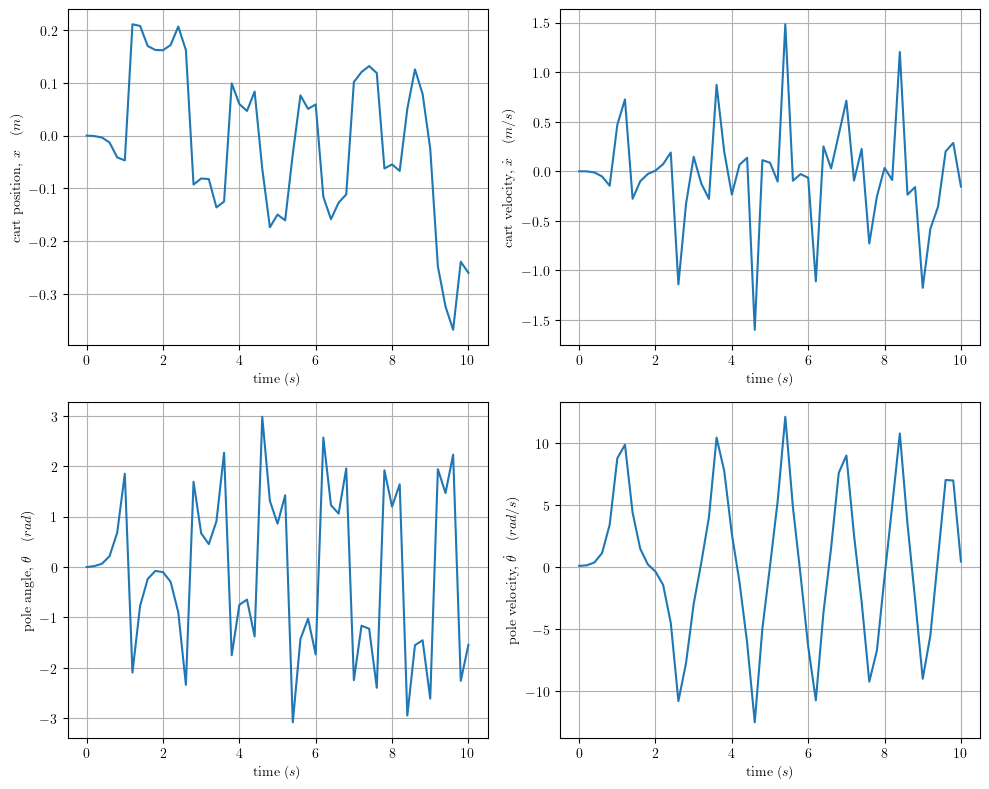

In [13]:
s0 = np.array([0, 0, 0, 0.1, 0])

x_hat, y_hat = model.simulate(time=10, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x_hat, y_hat, axs, fig,)



In [8]:
# Section 3.1 - Fit non-linear model to noisy target with action

In [10]:
# Linear model first
from LinearObserver_ import LinearObserver

model = LinearObserver.initialize_model(14, with_action=False)




In [ ]:
N = 11
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
model = LinearObserver.initialize_model(N=N, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1_linear__{N}_1")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(model.mse)


0.0247879882658026


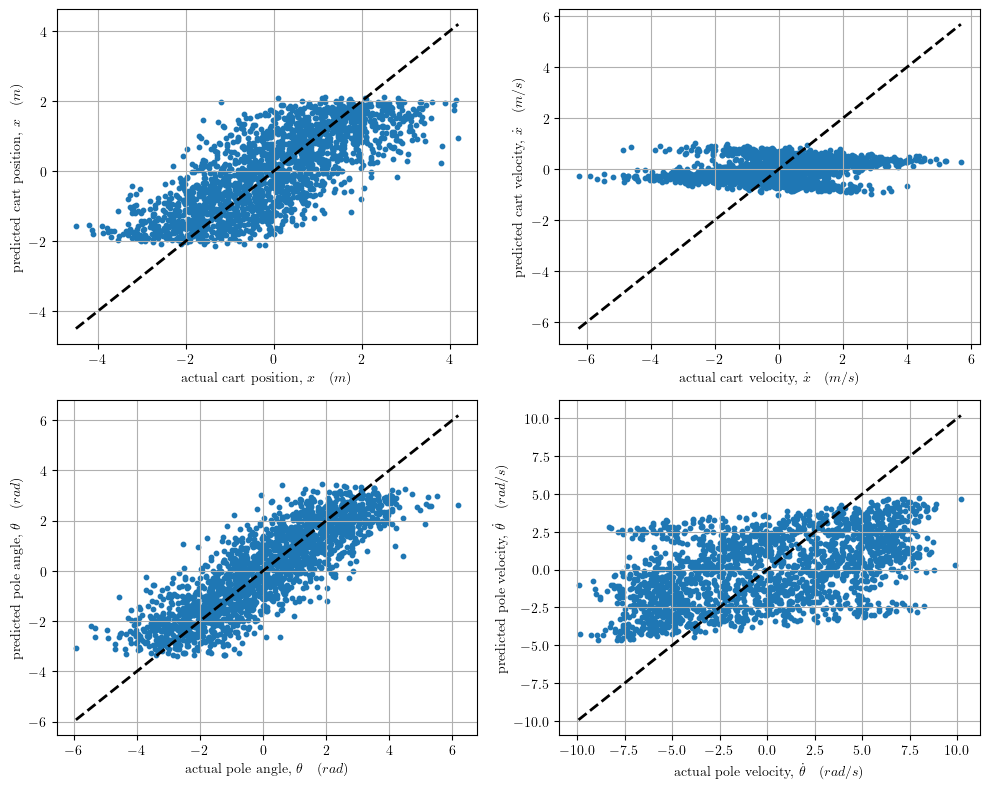

In [17]:
N = 11
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
model = LinearObserver.initialize_model(N=N, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1_linear__{N}_1")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(model.mse)


0.022320454881714677


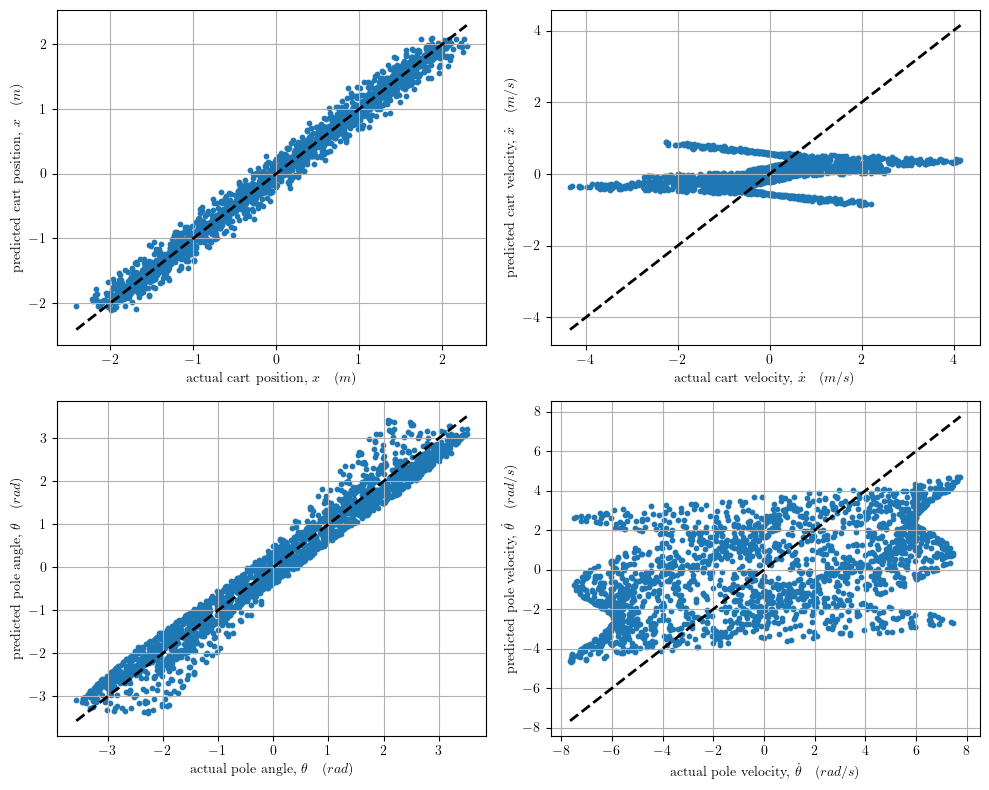

In [18]:
N = 11
target = CartPoleGaussianNoisyObs(False, loc=0, scale=0.001)
model = LinearObserver.initialize_model(N=N, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1_linear__{N}_001")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(model.mse)


0.022321148786566096


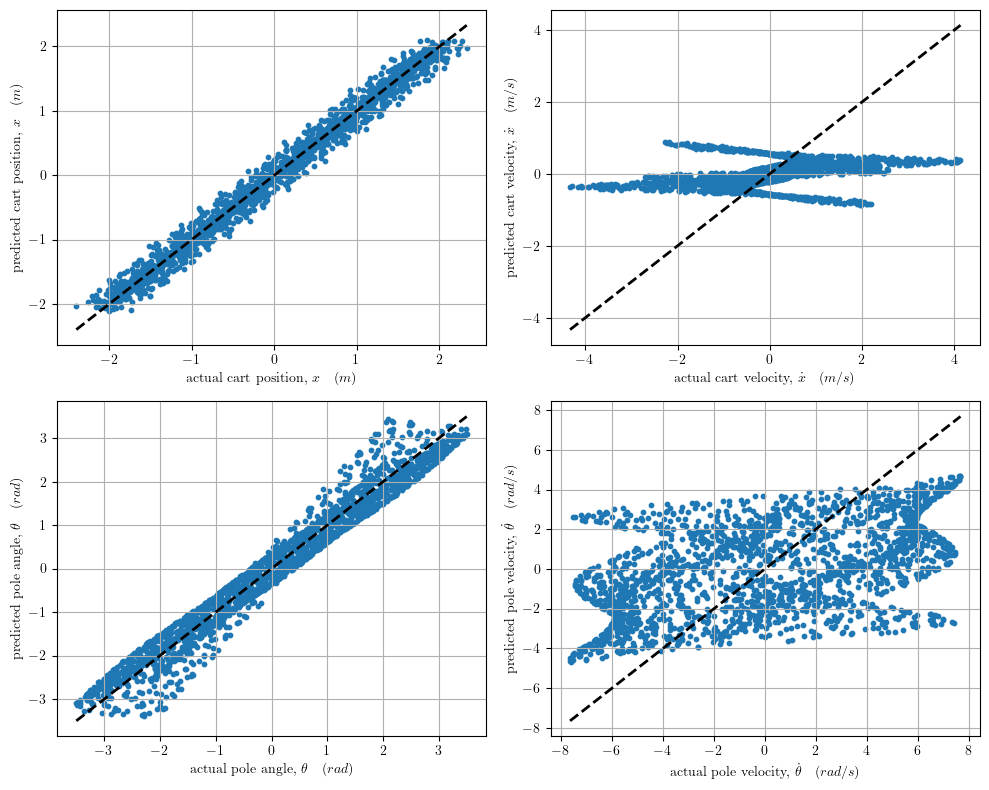

In [19]:
N = 11
target = CartPoleGaussianNoisyObs(False, loc=0, scale=0.00001)
model = LinearObserver.initialize_model(N=N, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1_linear__{N}_00001")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(model.mse)


In [ ]:
# Plot MSE against noise scale

In [64]:
from shared import get_mse


N = 10
M= 5

noise_scales = np.arange(0, 15, 0.5)

mse_hist2 = np.zeros_like(noise_scales)

for i, scale in enumerate(noise_scales):
    target = CartPoleGaussianNoisyObs(False, loc=0, scale=scale)
    target_no_noise = CartPole(False)
    model = NonLinearObserver.initialize_model(N=N, M=M,with_action=True)
    model.fit(target, enable_remap=False)
    mse = get_mse(target_no_noise, model,n_steps=1, m=10, d=5)
    mse_hist2[i] = mse

In [69]:
from shared import get_mse


N = 10
noise_scales = np.arange(0, 15, 0.5)

mse_hist = np.zeros_like(noise_scales)

for i, scale in enumerate(noise_scales):
    target = CartPoleGaussianNoisyObs(False, loc=0, scale=scale)
    target_no_noise = CartPole(False)
    model = LinearObserver.initialize_model(N=N,with_action=True)
    model.fit(target, enable_remap=False)
    mse = get_mse(target_no_noise, model, n_steps=1, m=10, d=5)
    mse_hist[i] = mse

In [74]:
from shared import get_mse


N = 10
M= 6

noise_scales = np.arange(0, 15, 0.5)

mse_hist3 = np.zeros_like(noise_scales)

for i, scale in enumerate(noise_scales):
    target = CartPoleGaussianNoisyObs(False, loc=0, scale=scale)
    target_no_noise = CartPole(False)
    model = NonLinearObserver.initialize_model(N=N, M=M,with_action=True)
    model.fit(target, enable_remap=False)
    mse = get_mse(target_no_noise, model, n_steps=1, m=10, d=5)
    mse_hist3[i] = mse

[Text(0, 0.5, 'RMSE'), Text(0.5, 0, 'time (s)')]

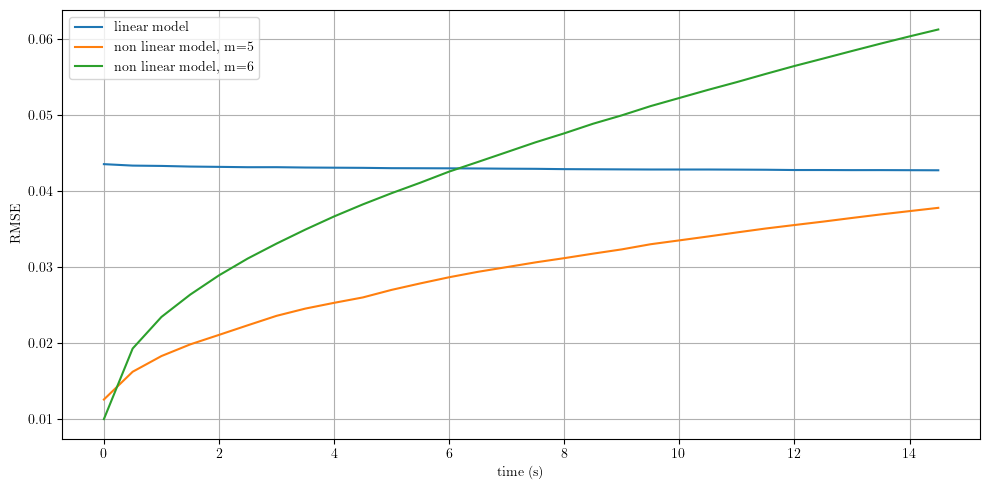

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
ax.plot(noise_scales, mse_hist, label='linear model')
ax.plot(noise_scales, mse_hist2, label='non linear model, m=5')
ax.plot(noise_scales, mse_hist3, label='non linear model, m=6')
ax.grid()
# ax.set_yscale('log')
ax.legend()
ax.set(ylabel="RMSE", xlabel=f"time (s)")

5
(1024, 5)
(5, 4)
0.043510754735498695


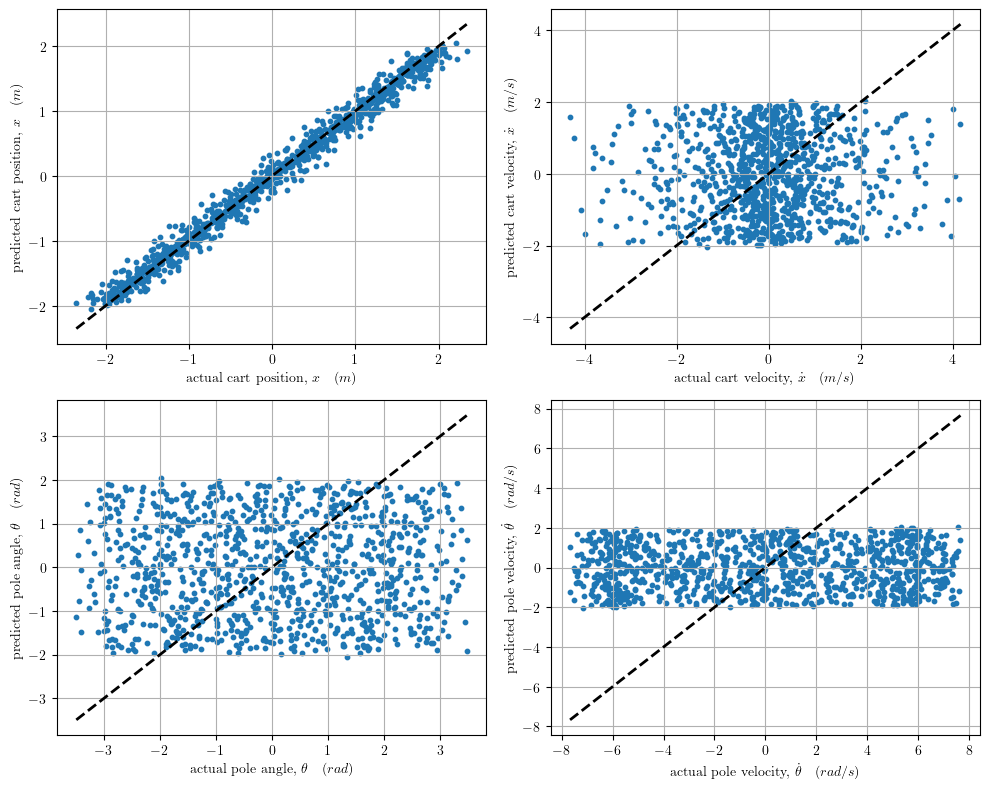

In [90]:
from shared import get_actual_and_predicted_change

N = 10

target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
model = LinearObserver.initialize_model(N=N, with_action=True)
model.fit(target, enable_remap=False)


x, y = get_actual_and_predicted_change(target_no_noise, model, 1, m=10, d=5)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target_no_noise, model, n_steps=1, m=10, d=5))


0.01831943369897328


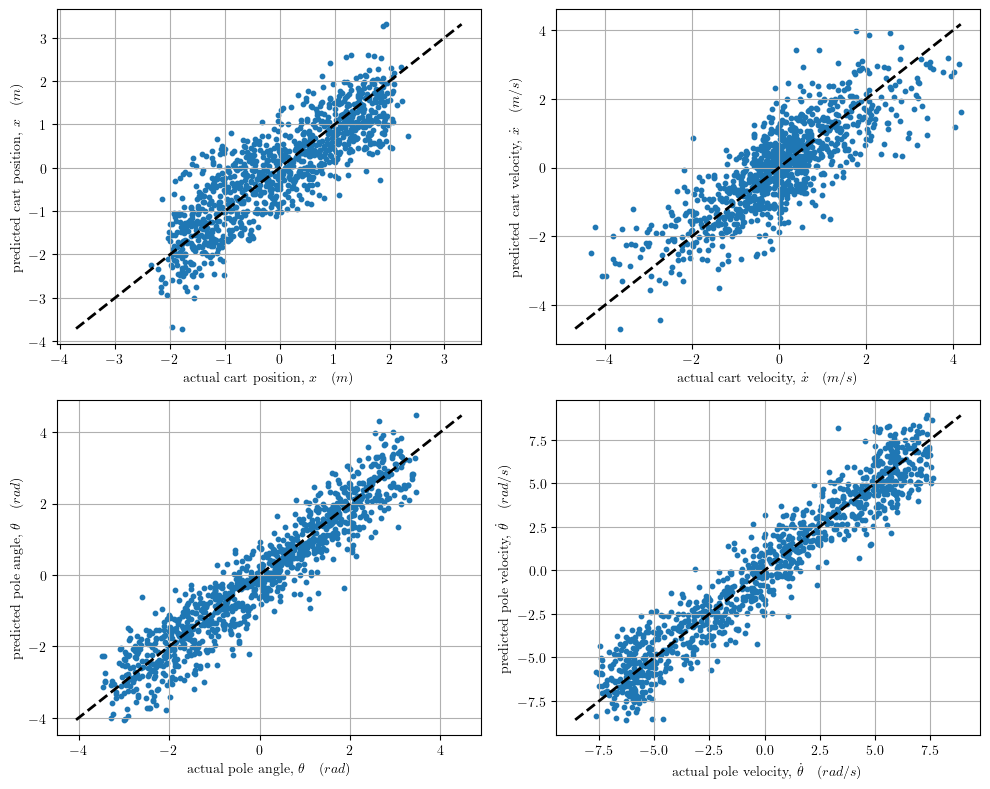

In [79]:
from shared import get_actual_and_predicted_change

N = 10
M= 5
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
model = NonLinearObserver.initialize_model(N=N, M=M,with_action=True)
model.fit(target, enable_remap=False)


x, y = get_actual_and_predicted_change(target_no_noise, model, 1, m=10, d=5)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target_no_noise, model, n_steps=1, m=10, d=5))



0.043834871677451565


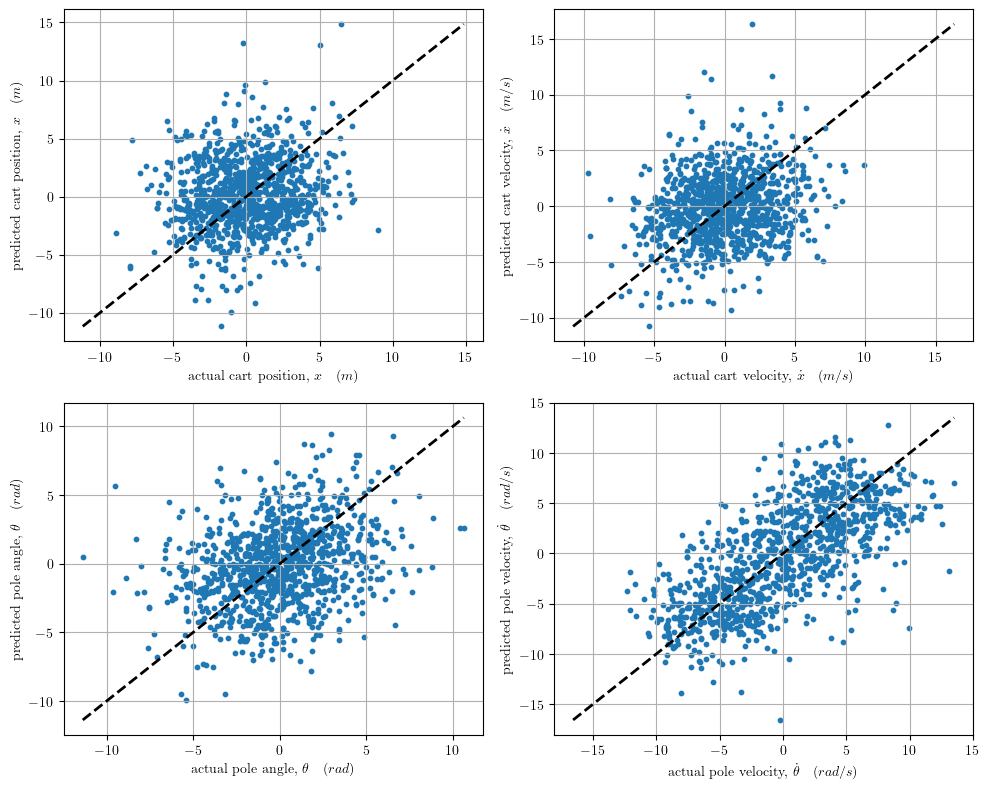

In [80]:
from shared import get_actual_and_predicted_change

N = 10
M = 6
target = CartPoleGaussianNoisyObs(False, loc=0, scale=6.5)
target_no_noise = CartPole(False)

model = NonLinearObserver.initialize_model(N=N, M=M,with_action=True)
model.fit(target, enable_remap=False)


x, y = get_actual_and_predicted_change(target, model, 1, m=10, d=5)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target_no_noise, model, n_steps=1, m=10, d=5))



0.042976687091983455


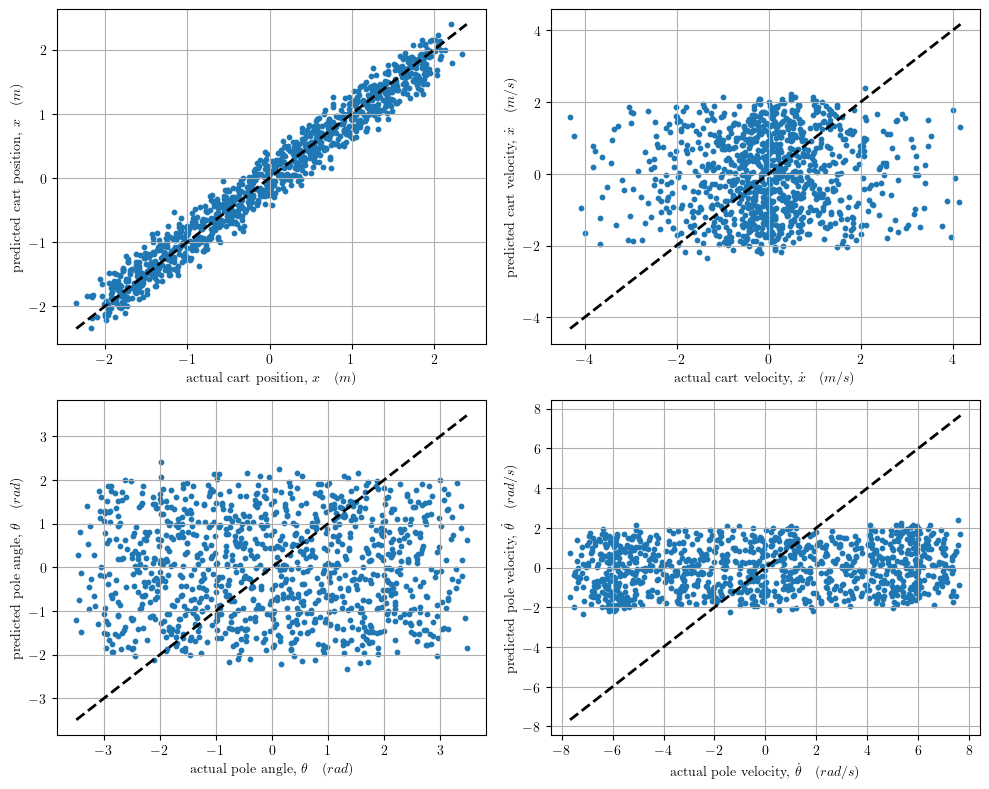

In [81]:
from shared import get_actual_and_predicted_change

N = 10

target = CartPoleGaussianNoisyObs(False, loc=0, scale=6.5)
target_no_noise = CartPole(False)

model = LinearObserver.initialize_model(N=N, with_action=True)
model.fit(target, enable_remap=False)


x, y = get_actual_and_predicted_change(target_no_noise, model, 1, m=10, d=5)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target_no_noise, model, n_steps=1, m=10, d=5))



In [6]:
## Test model and target is working

In [ ]:
target_dummy = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
model_dummy = NonLinearObserver.initialize_model(N=11, M=6, with_action=True)
x, y = model_dummy.fit(target_dummy, enable_remap=False)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)
print(model_dummy.mse)

In [8]:
s0 = np.array([0, 0, 0, 0.1, 2])

x, y = target_dummy.simulate(time=4, state=s0, remap=True)
x_hat, y_hat = model_dummy.simulate(time=4, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=3)


NameError: name 'np' is not defined

In [90]:
## Fit actual model

0.0023279686630601863


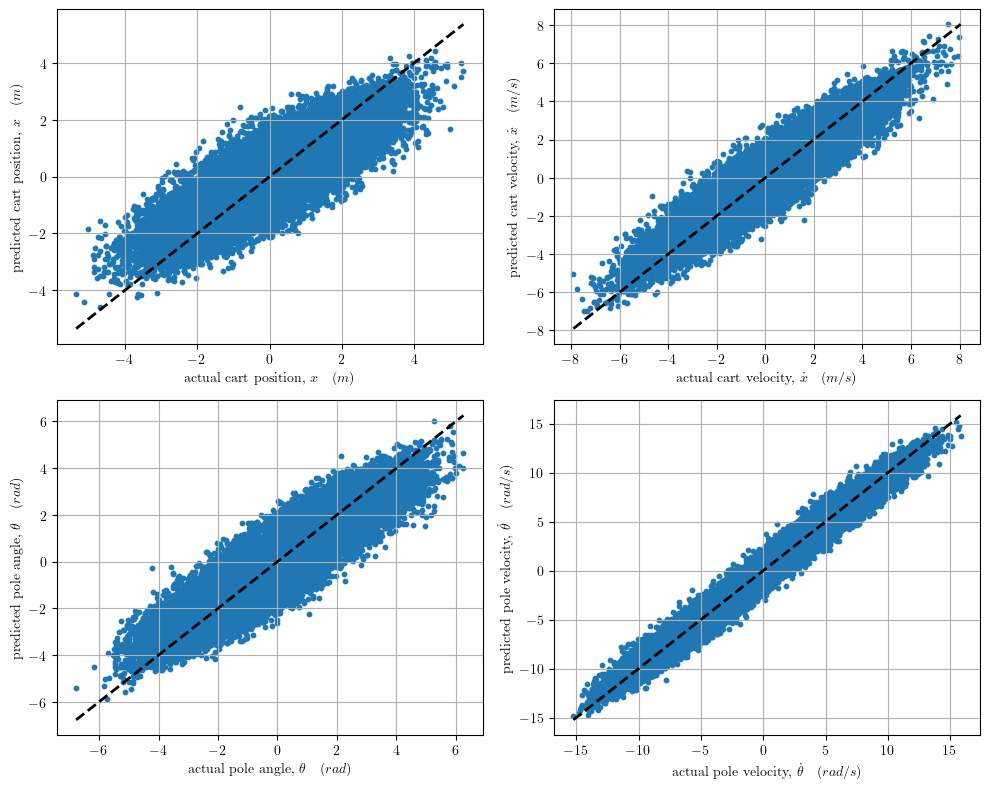

In [8]:
N = 15
M = 10

target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1__{N}__{M}_1")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(model.mse)

0.00039994097939585396


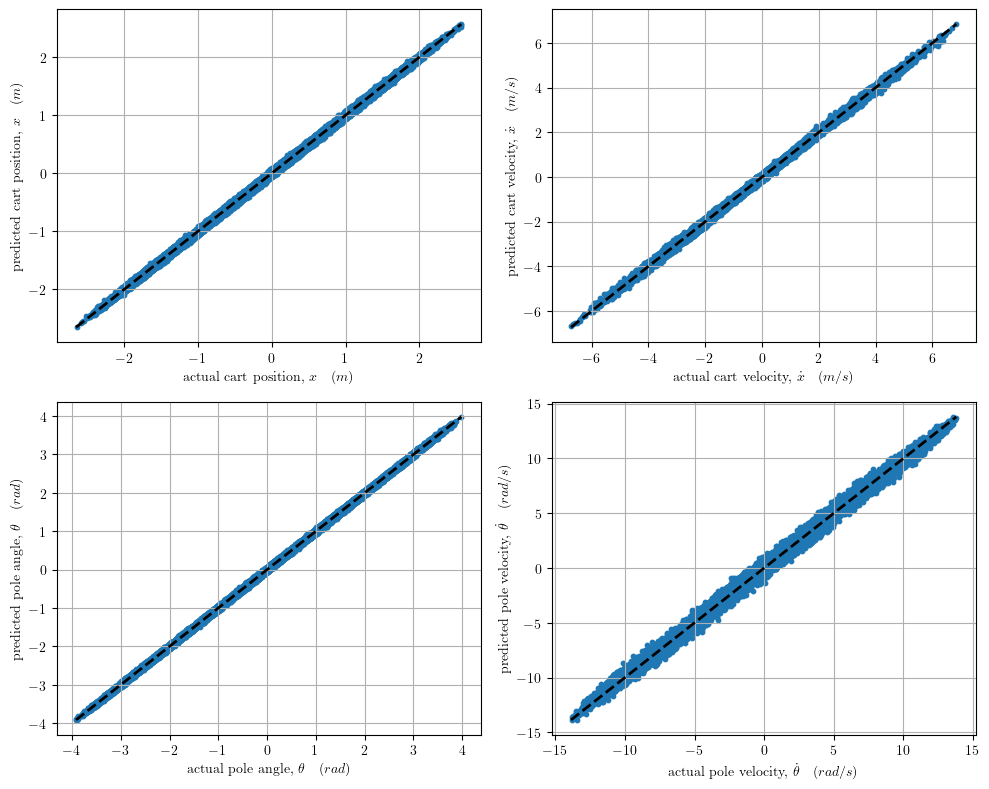

In [9]:
N = 15
M = 10

target = CartPoleGaussianNoisyObs(False, loc=0, scale=0.001)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1__{N}__{M}_001")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(model.mse)

0.0003930479620694162


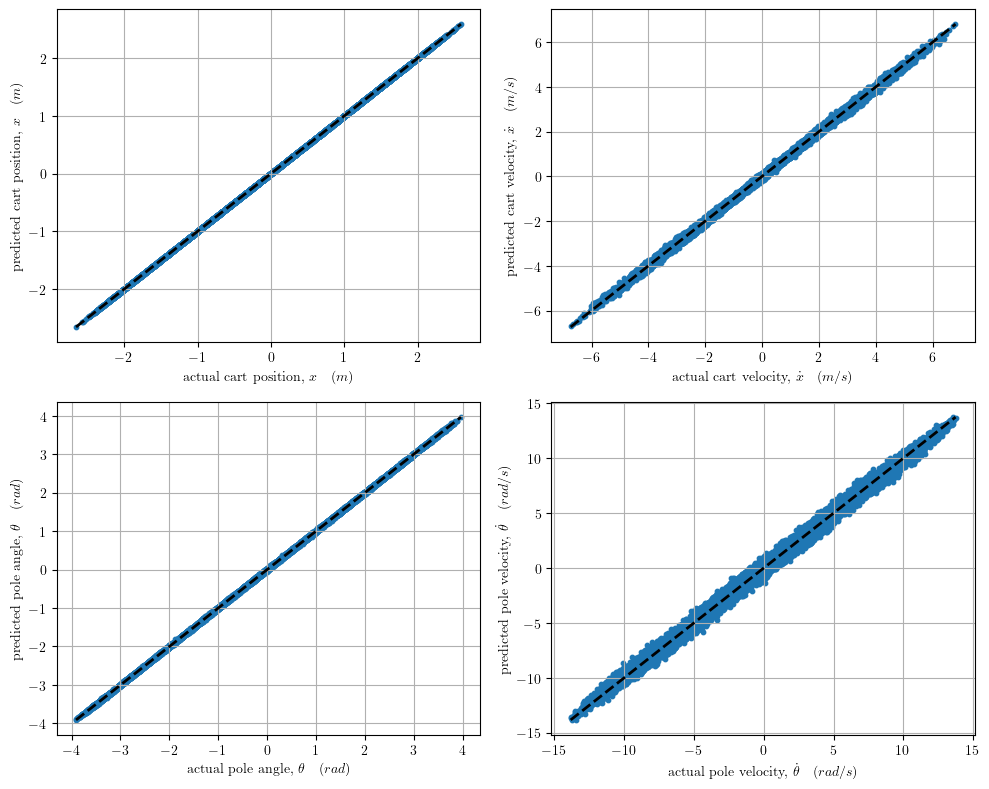

In [7]:
N = 15
M = 10

target = CartPoleGaussianNoisyObs(False, loc=0, scale=0.00001)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1__{N}__{M}_00001")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(model.mse)

In [119]:
## Test against dummy trajectory

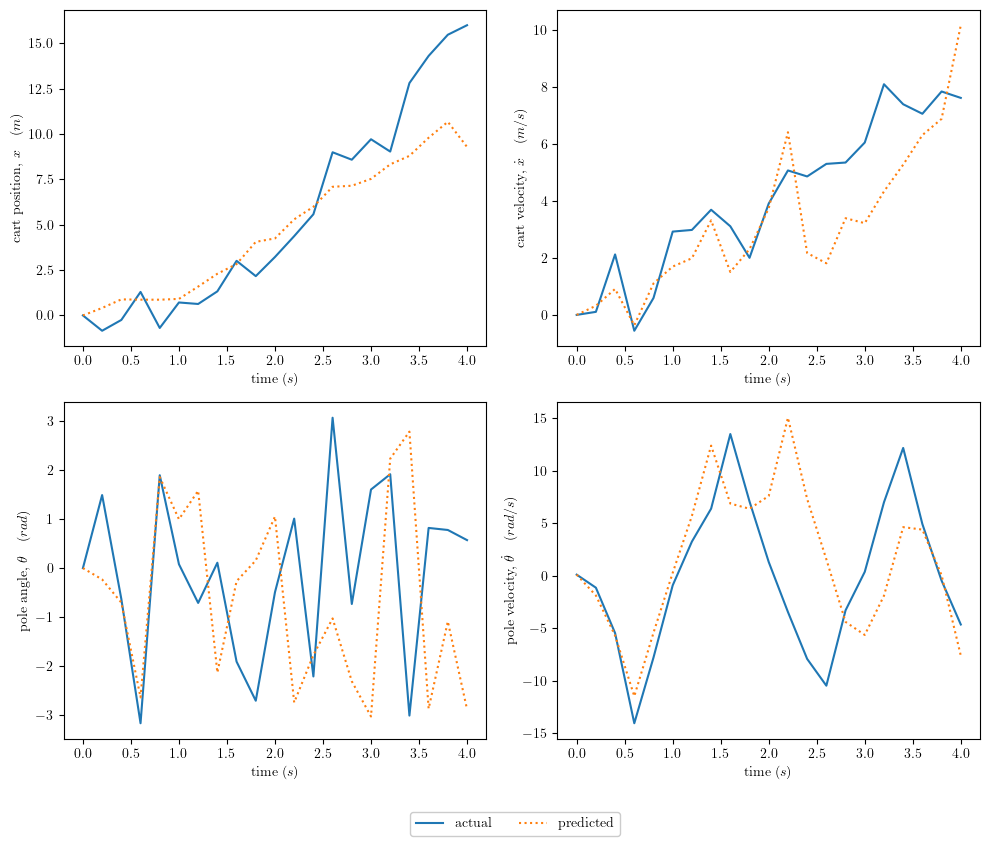

In [126]:
s0 = np.array([0, 0, 0, 0.1, 2])

# x, y = target.simulate(time=4, state=s0, remap=True)
x_hat, y_hat = model.simulate(time=4, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=3)

In [127]:
model.mse

0.0023279686630601863

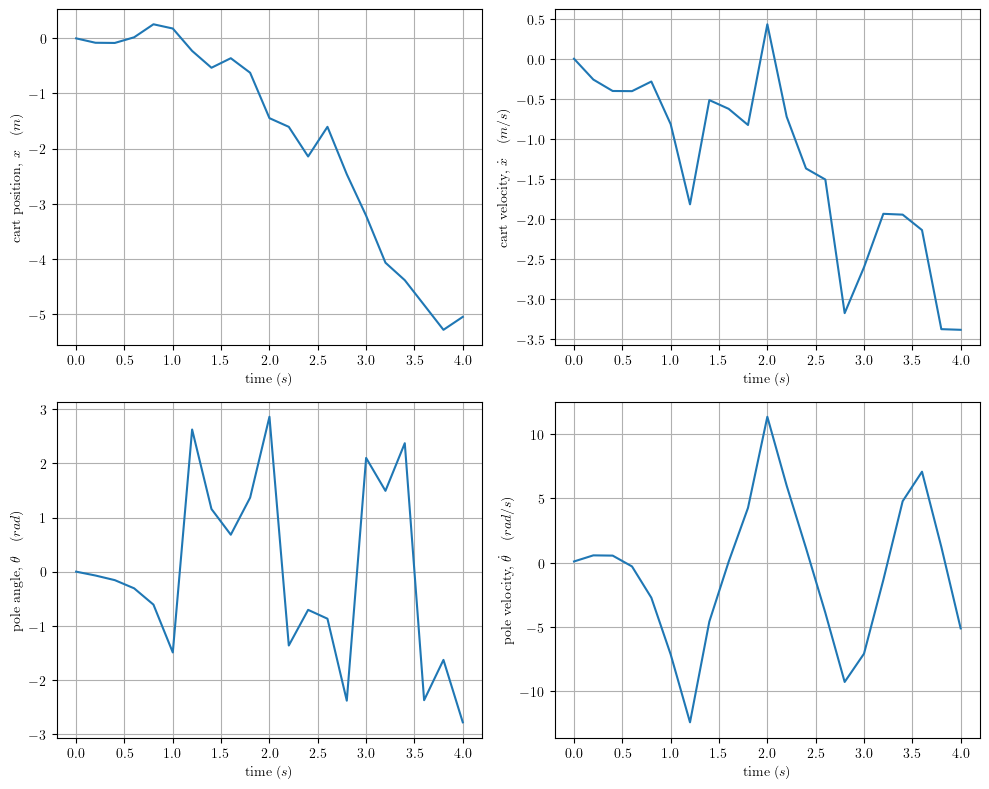

In [15]:
# Load from save file

model = NonLinearObserver.initialize_model(N=14, M=9, with_action=True)
model.load_model("./models/3_1__15__10")

s0 = np.array([0, 0, 0, 0.1, 0])

x_hat, y_hat = model.simulate(time=4, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x_hat, y_hat, axs, fig)


In [94]:
# Section 3.2 - Fit non-linear model to noisy target (observation and dynamics) with action

In [ ]:
N = 11
target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = LinearObserver.initialize_model(N=N, with_action=True)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_1_linear__{N}")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)
print(model.mse)


In [95]:
## Test model and target is working

0.008898973186505165


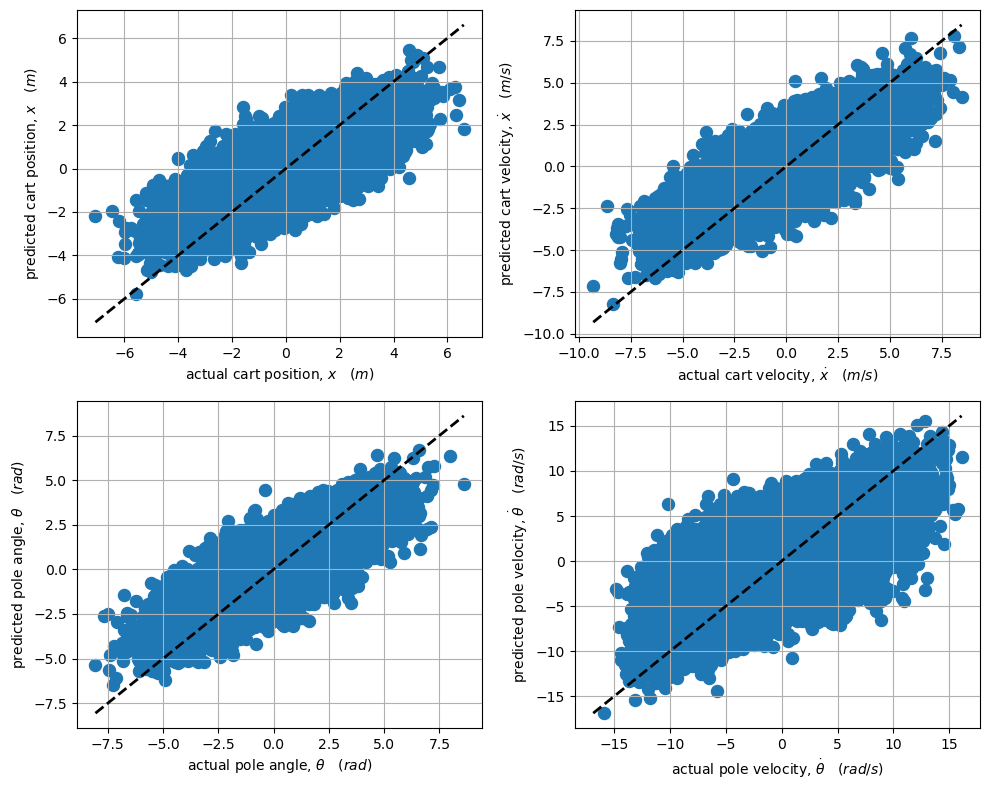

In [14]:
from NonLinearObserver_ import NonLinearObserver

N = 14
M = 9

target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)
print(model.mse)
model.save_model(f"./models/3_2__{N}__{M}")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)

0.012485245589810182


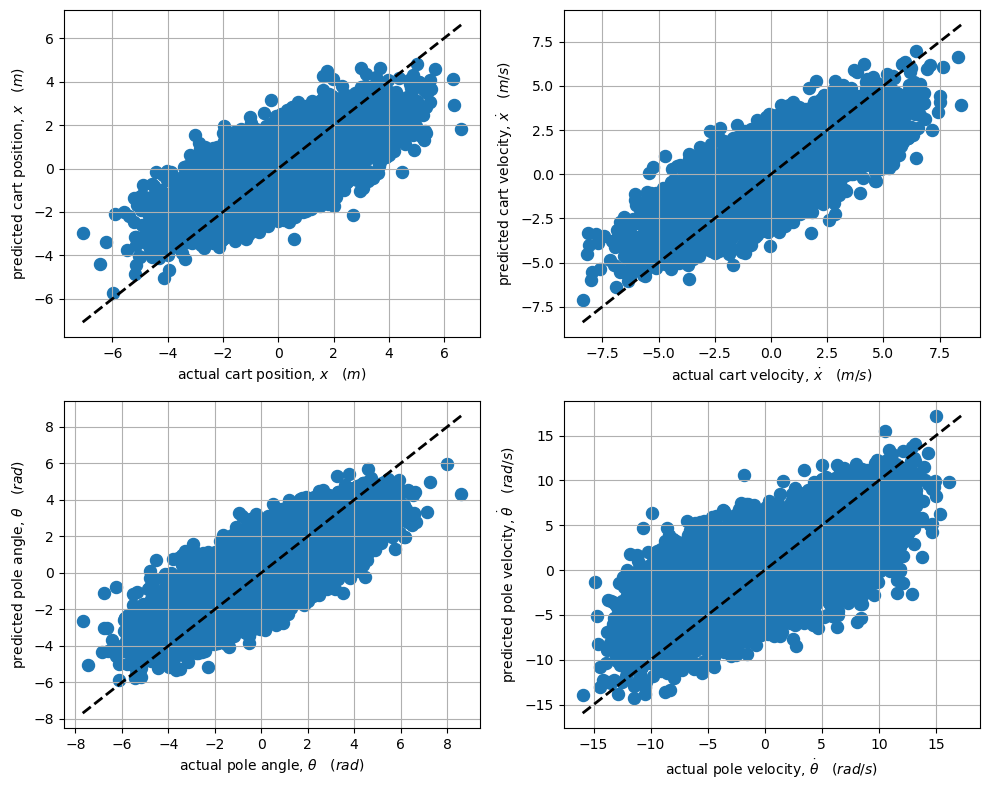

In [15]:
from NonLinearObserver_ import NonLinearObserver

N = 13
M = 8

target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)
print(model.mse)
model.save_model(f"./models/3_2__{N}__{M}")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)

0.025069816009605592


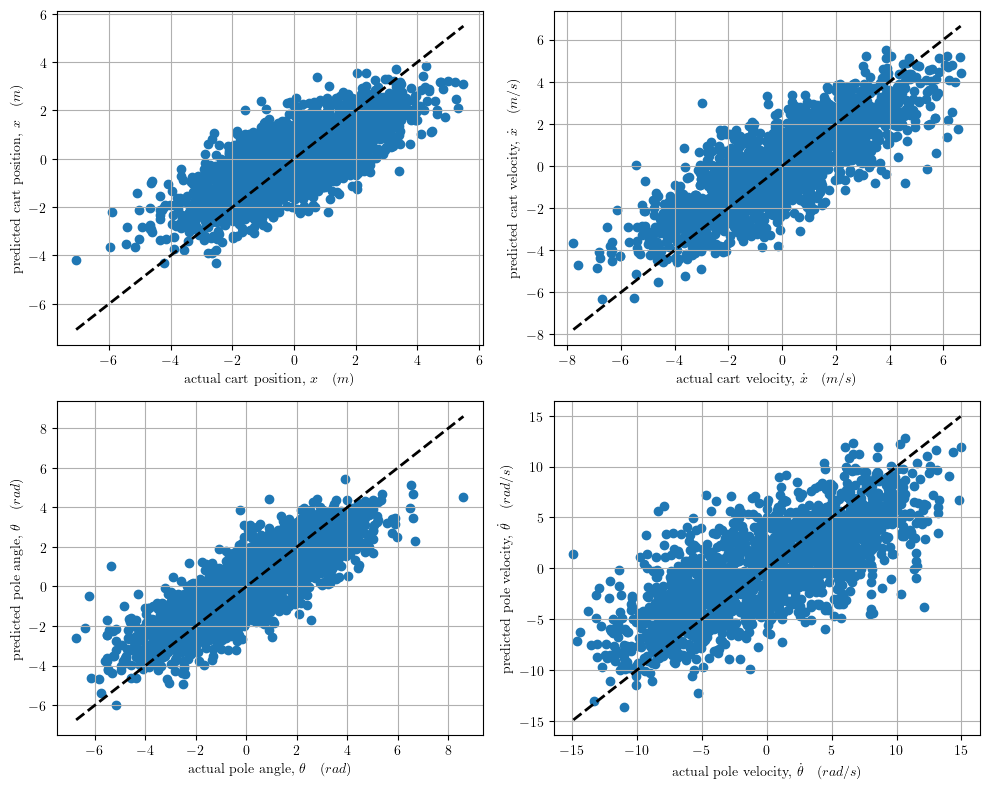

In [133]:
N = 11
M = 6

target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)
print(model.mse)
model.save_model(f"./models/3_2__{N}__{M}")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)

In [138]:
## Fit larger model

In [134]:
N = 15
M = 10

target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
x, y = model.fit(target, enable_remap=False)
print(model.mse)
model.save_model(f"./models/3_2__{N}__{M}")

0.006282301911239492


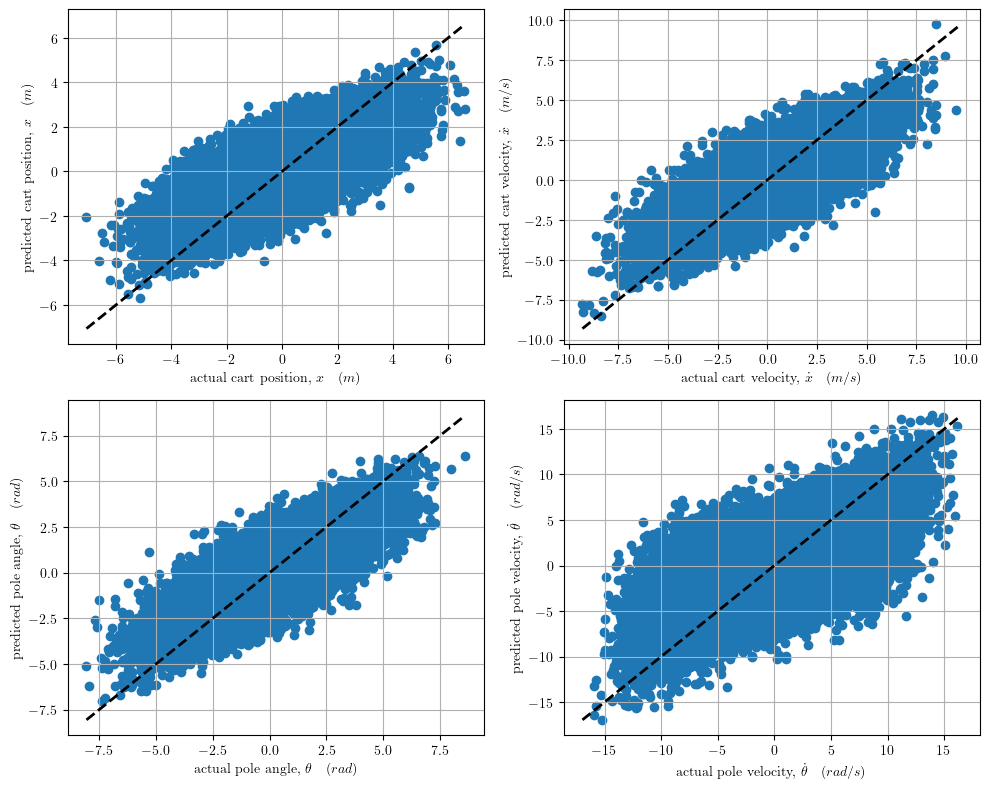

In [137]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig)

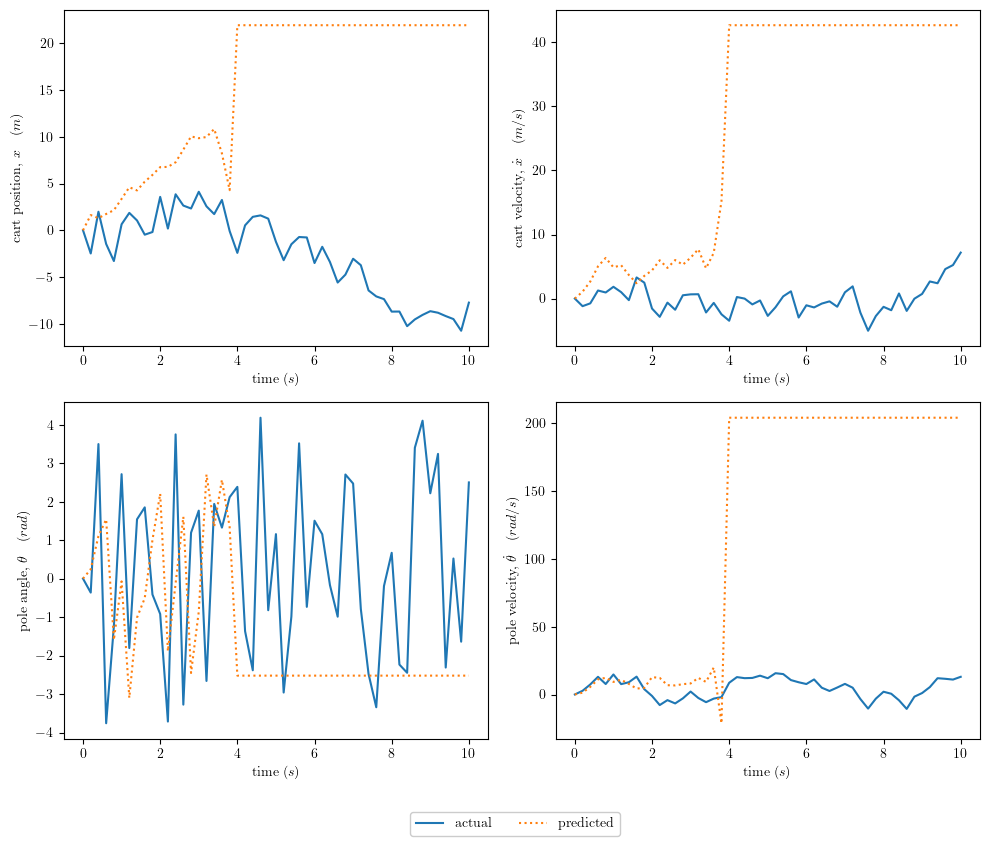

In [146]:
s0 = np.array([0, 0, 0, 0.1, 0])

x, y = target.simulate(time=10, state=s0, remap=True)
x_hat, y_hat = model.simulate(time=10, state=s0, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_rollout(x, y, axs, fig, label='actual')
plot_rollout(x_hat, y_hat, axs, fig, label='predicted', linestyle='dotted')
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=3)

In [7]:
# Load from save file

model = NonLinearObserver.initialize_model(N=15, M=10, with_action=True)
model.load_model("./models/3_2__15__10")

In [ ]:
# The reason for the flatlining is due to:
# When the states increases, the exponent becomes increasingly negative
# Hence the kernel matrix becomes zero, and the change in the system becomes zero.

5
(1024, 5)
(5, 4)
(5, 4)
0.04508195874217341


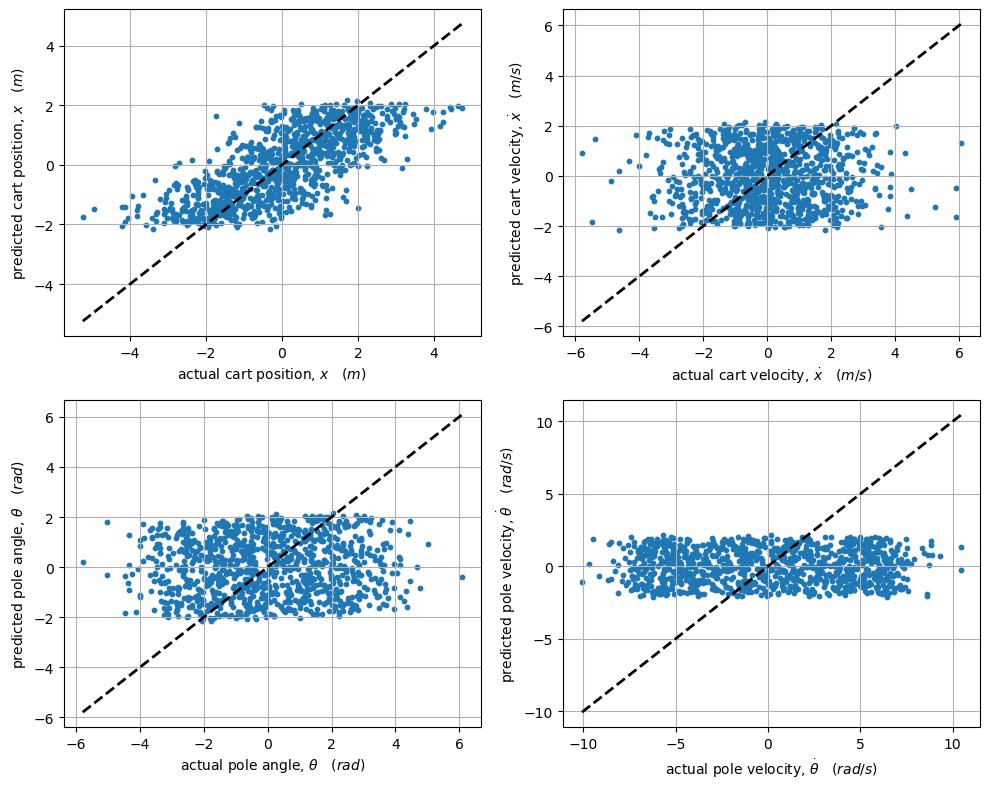

In [12]:
from shared import get_actual_and_predicted_change, get_mse
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObsDyn, CartPole, CartPoleGaussianNoisyObs 
from LinearObserver_ import LinearObserver
import matplotlib.pyplot as plt
from shared import plot_fit_scatter

N = 10

target = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
train_target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
# target = CartPole(False)
# train_target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
model = LinearObserver.initialize_model(N=N, with_action=True)
model.fit(target, enable_remap=False)
print(model.w.shape)


x, y = get_actual_and_predicted_change(target, model, 1, m=10, d=5)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target, model, n_steps=1, m=10, d=5))

In [ ]:
from shared import get_actual_and_predicted_change, get_mse

N = 10
M = 5

target = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
train_target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
model.fit(target, enable_remap=False)
print(model.shape)


x, y = get_actual_and_predicted_change(target, model, 1, m=10, d=5)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target, model, n_steps=1, m=10, d=5))

[[  2.91881888  -4.12320637  -6.96553066  15.7003116 ]
 [  5.76351456   6.29508908  -2.49543565  -1.51156228]
 [  8.36475151   9.70511131   2.54736962  18.16626948]
 ...
 [ 15.87537729  10.52314966   8.57775703  -2.058981  ]
 [ -1.70314631  -0.35238414  -6.77830457 -26.48190934]
 [  0.69560332  -4.77784713  -5.95498998 -15.23945652]]
0.02573505848645881


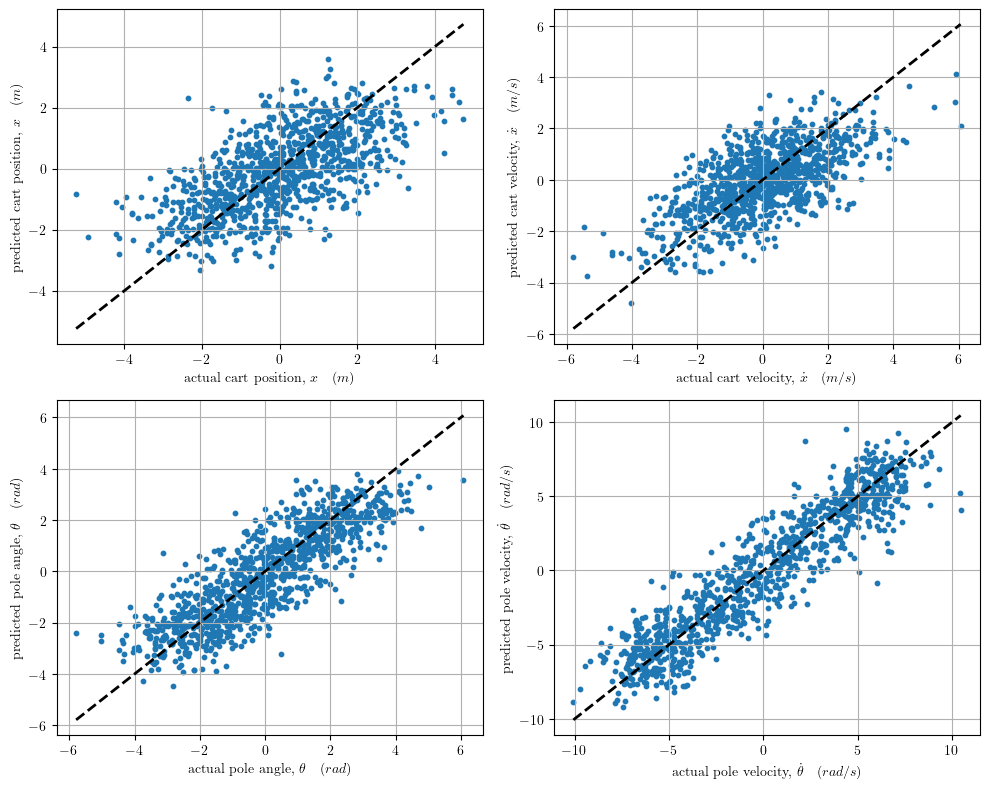

In [83]:
from shared import get_actual_and_predicted_change, get_mse

N = 10
M = 5

target = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
train_target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
model.fit(target, enable_remap=False)
print(model.shape)


x, y = get_actual_and_predicted_change(target, model, 1, m=10, d=5)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target, model, n_steps=1, m=10, d=5))

# 3.3


0.04817011477500424


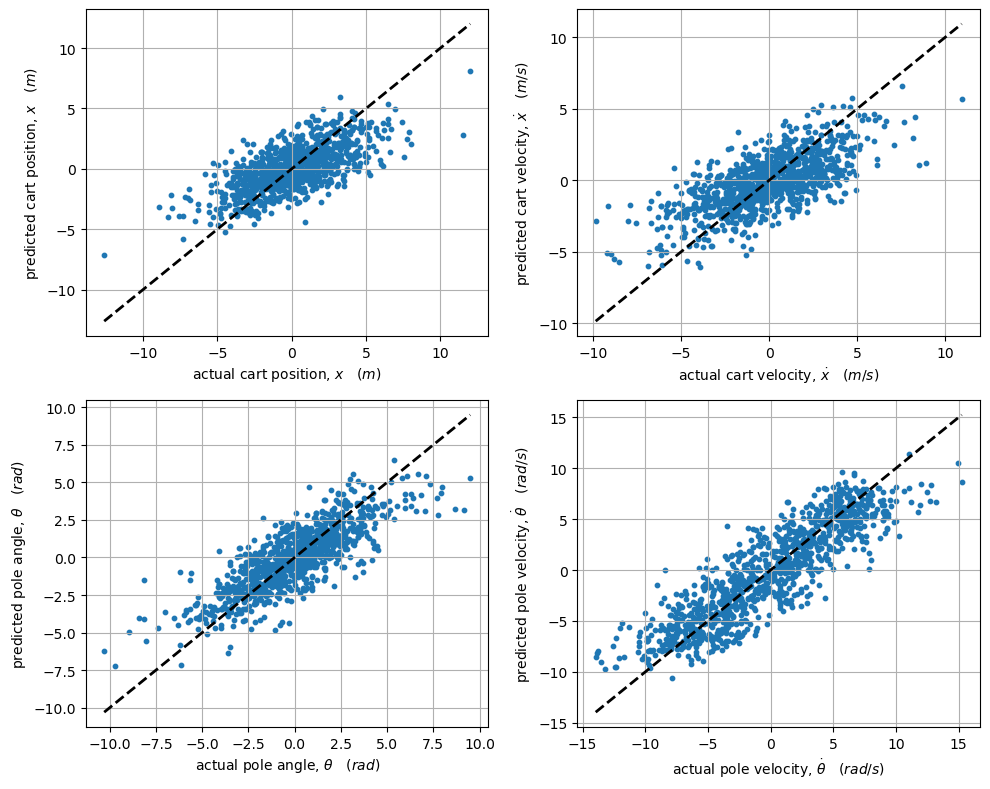

In [13]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from NonLinearObserver_ import NonLinearObserver
from shared import get_noise_scales, get_trend, plot_fit_scatter, get_mse
import matplotlib.pyplot as plt
N = 10
M = 5


target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=False)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_3__{N}__{M}")
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target, model, n_steps=1, m=10, d=5))

0.02006189306106382


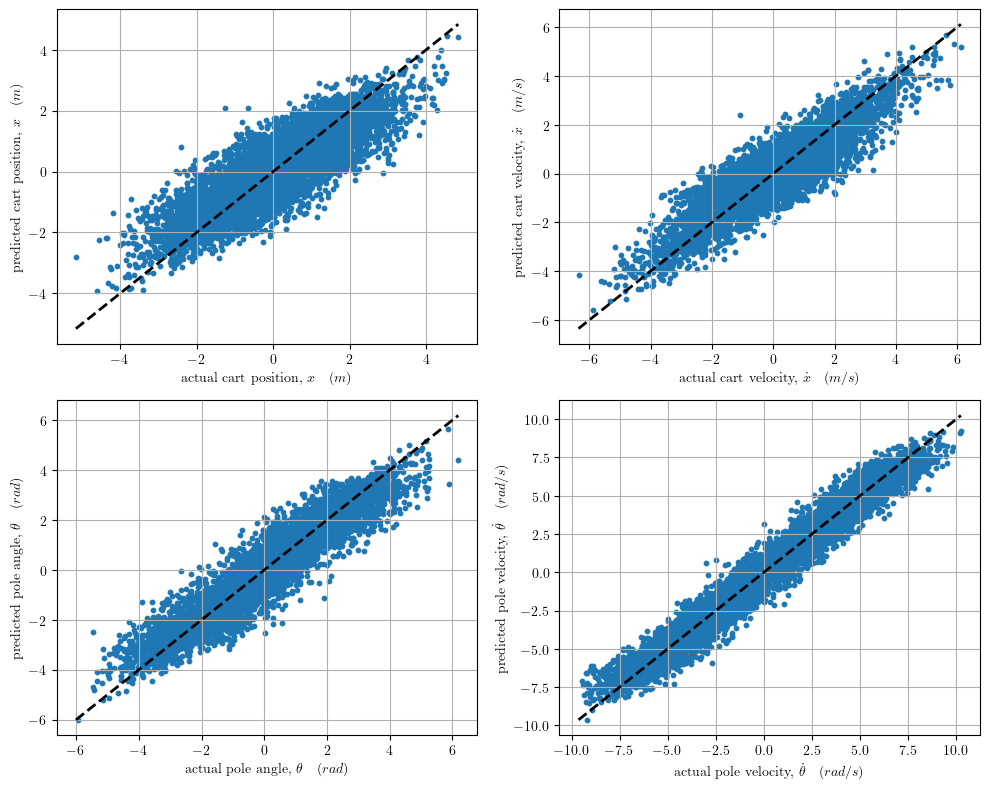

In [7]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from NonLinearObserver_ import NonLinearObserver
from shared import get_noise_scales, get_trend, plot_fit_scatter, get_mse
import matplotlib.pyplot as plt
N = 13
M = 8


target = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=False)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_3__{N}__{M}")
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target, model, n_steps=1, m=10, d=5))

# 3.4

0.03434177906097749


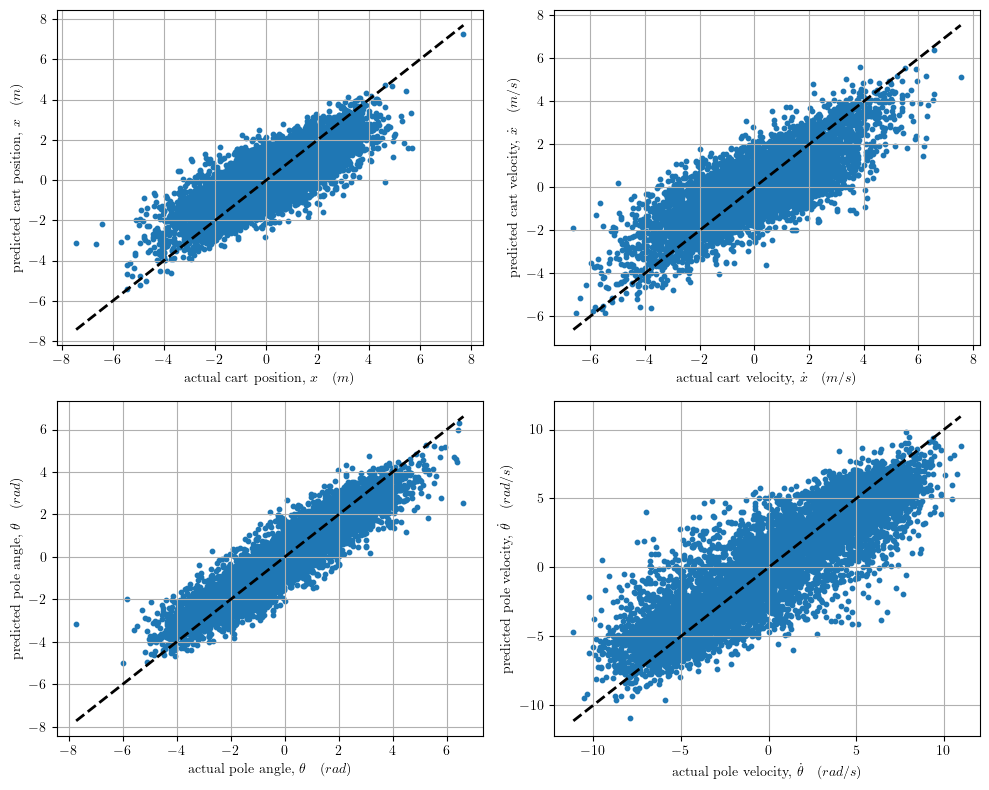

In [14]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObsDyn
from NonLinearObserver_ import NonLinearObserver
from shared import get_noise_scales, get_trend, plot_fit_scatter, get_mse
import matplotlib.pyplot as plt
N = 13
M = 8


target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=False)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_4__{N}__{M}")
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target, model, n_steps=1, m=10, d=5))

# 3.5

0.03058689998935741


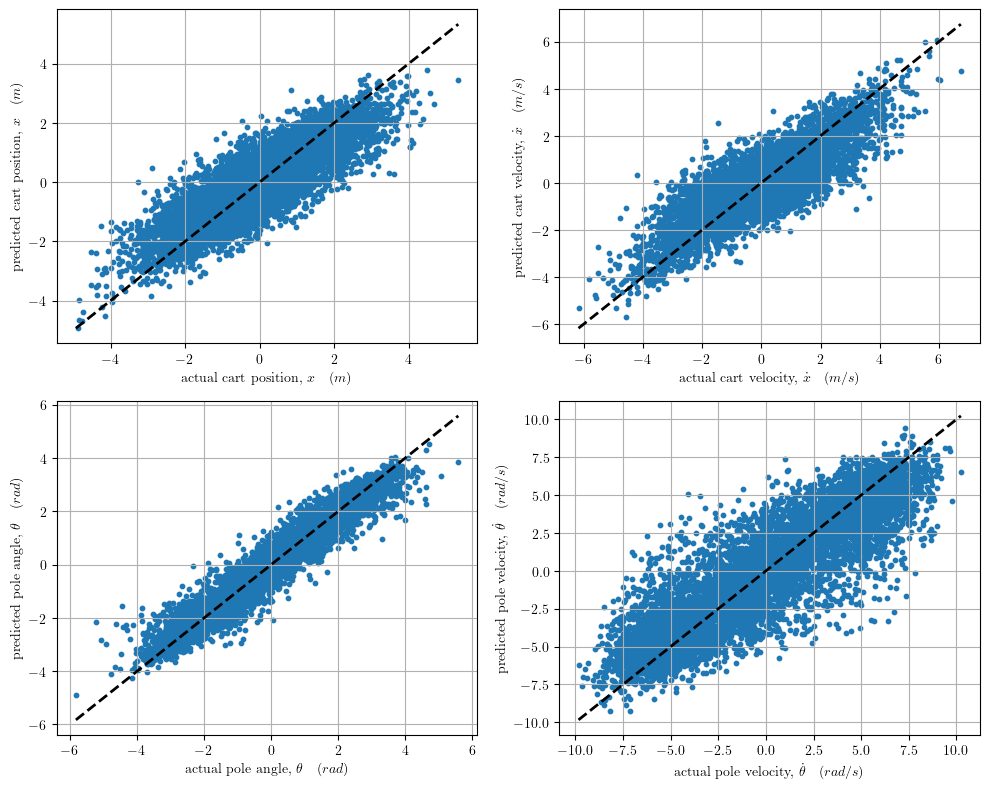

In [13]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyDyn
from NonLinearObserver_ import NonLinearObserver
from shared import get_noise_scales, get_trend, plot_fit_scatter, get_mse
import matplotlib.pyplot as plt
N = 13
M = 8


target = CartPoleDynamicGaussianNoisyDyn(False, loc=0, factor=0.1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=False)
x, y = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_5__{N}__{M}")
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
plot_fit_scatter(x, y, axs, fig, s=10)
print(get_mse(target, model, n_steps=1, m=10, d=5))

In [14]:
N = 13
M = 8

target = CartPole(False)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
_ = model.fit(target, enable_remap=False)
model.save_model(f"./models/2_2__{N}__{M}")

In [12]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs, CartPoleDynamicGaussianNoisyObsDyn, CartPoleDynamicGaussianNoisyDyn
N = 13
M = 8

target = CartPoleDynamicGaussianNoisyObs(False, loc=0.5, factor=0.1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
_ = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_3__{N}__{M}_05")

In [8]:
N = 13
M = 8

target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0.5, factor=0.1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
_ = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_4__{N}__{M}_05")

In [13]:
N = 13
M = 8

target = CartPoleDynamicGaussianNoisyDyn(False, loc=0.5, factor=0.1)
model = NonLinearObserver.initialize_model(N=N, M=M, with_action=True)
_ = model.fit(target, enable_remap=False)
model.save_model(f"./models/3_5__{N}__{M}_05")